In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/zenolucas/Desktop/SCHOOLING/dataAnalytics/TS_spotify.csv')
data


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Unnamed: 18,Unnamed: 19
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,83,202395,NaN,Midnights
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,83,218270,NaN,86
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,84,200690,NaN,NaN
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,82,256124,NaN,NaN
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,83,194206,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1246,Mary's Song (Oh My My My) - Instrumental w/ BG...,Taylor Swift (Karaoke Version),2006-10-24,10,1QMmJSW0E8rdJRMGOUrnJd,spotify:track:1QMmJSW0E8rdJRMGOUrnJd,0.000074,0.472,0.521,0.545000,0.1350,-10.802,0.0305,151.014,0.3050,3,216120,NaN,NaN
754,1247,Our Song - Instrumental w/ BG vocals,Taylor Swift (Karaoke Version),2006-10-24,11,0EQovrrG0oNLPLJrVGKqj0,spotify:track:0EQovrrG0oNLPLJrVGKqj0,0.029500,0.627,0.493,0.003460,0.1430,-9.273,0.0300,89.025,0.5280,7,204200,NaN,NaN
755,1248,I'm Only Me When I'm With You - Instrumental w...,Taylor Swift (Karaoke Version),2006-10-24,12,0k7VfuL6QDZDItHMfStLGr,spotify:track:0k7VfuL6QDZDItHMfStLGr,0.000068,0.535,0.800,0.765000,0.3090,-8.801,0.0319,144.020,0.8360,4,223280,NaN,NaN
756,1249,Invisible - Instrumental w/ BG vocals,Taylor Swift (Karaoke Version),2006-10-24,13,5dNcm3dP4bdBHuFmOs2ZOG,spotify:track:5dNcm3dP4bdBHuFmOs2ZOG,0.287000,0.576,0.270,0.662000,0.1000,-11.997,0.0297,95.987,0.1450,2,206373,NaN,NaN


In [3]:
mean = data.groupby("album").aggregate({"popularity" : "mean"}).reset_index()
mean


,album,popularity
0,1989,31.357143
1,1989 (Big Machine Radio Release Special),30.884615
2,1989 (Deluxe Edition),59.157895
3,Fearless,17.000000
4,Fearless (Big Machine Radio Release Special),34.961538
5,Fearless (International Version),36.062500
6,Fearless (Karaoke Version),6.615385
7,Fearless (Platinum Edition),47.210526
8,Fearless (Taylor's Version),65.961538
9,Live From Clear Channel Stripped 2008,34.000000


In [4]:
mean.columns

Index(['album', 'popularity'], dtype='object')

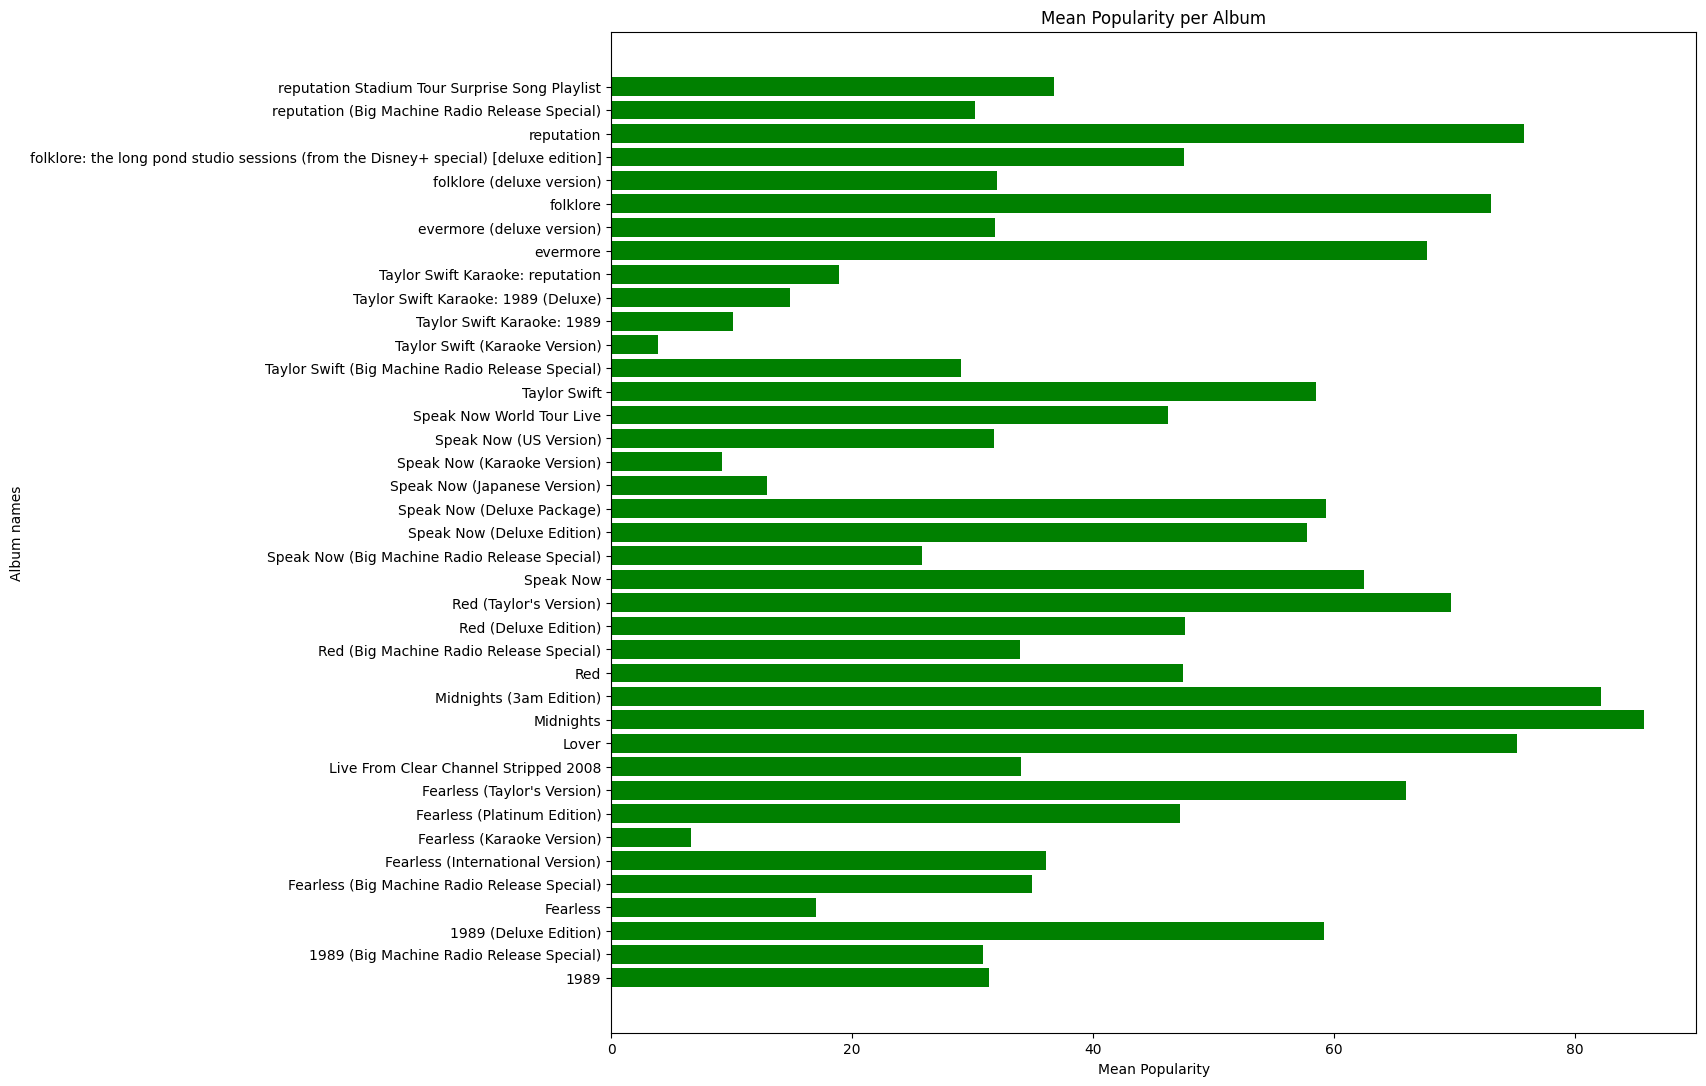

In [10]:
df = pd.DataFrame(mean)

plt.figure(figsize=[14,13])

X = mean["album"]
Y = mean["popularity"]

plt.barh(X, Y, color='g')
plt.title("Mean Popularity per Album")
plt.xlabel("Mean Popularity")
plt.ylabel("Album names")
plt.show()